<a href="https://colab.research.google.com/github/sbj6364/piano-sequencer/blob/main/07_pitch_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7번 : 음원 변형하기 - pitch

지난 문제를 통해, 이제 [C,D,E,F,G,A,B] 로 이루어진 모든 시퀀스를 생성할 수 있게 되었습니다!

하지만 우리의 피아노는 아직 C#, A# 과 같은 음정을 생성할 수 없습니다. 음원 파일이 주어져 있지 않았기 때문입니다.

이번 문제에서는 `librosa.effects.pitch_shift` 함수를 활용하여 주어진 음원들로부터 C#, A# 과 같은 음원들을 생성해보도록 합시다.

음원과 semitone 을 입력받아, 해당 음원을 해당 semitone 만큼 pitch shift 시킨 음원을 생성하고,

실제로 변환된 음원의 chroma spectrogram을 하나의 이미지에 그려서 저장하는 코드를 작성해주세요.

#### 베이스라인
~~~python
def pitch_shift(audio, sr, semitone):
		''' 
		code here 
		'''
		return shifted

plt.close()
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
librosa.display.specshow(Chroma(piano['C']))
plt.title('C')
plt.subplot(1,3,2)
librosa.display.specshow(Chroma(pitch_shift(piano['C'], sr, 1)))
plt.title('C->C#')
plt.subplot(1,3,3)
librosa.display.specshow(Chroma(pitch_shift(piano['C'], sr, 2)))
plt.title('C->D')
plt.tight_layout()
plt.savefig('pitch_shift.png')
~~~

In [75]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np 

In [ ]:
import librosa
do, sr_do = librosa.load('do.mp3', sr=None)
re, sr_re = librosa.load('re.mp3', sr=None)
mi, sr_mi = librosa.load('mi.mp3', sr=None)
fa, sr_fa = librosa.load('fa.mp3', sr=None)
sol, sr_sol = librosa.load('sol.mp3', sr=None)
ra, sr_ra = librosa.load('ra.mp3', sr=None)
si, sr_si = librosa.load('si.mp3', sr=None)

In [ ]:
# 방법 1
piano = {'do':do, 're':re, 'mi':mi, 'fa':fa, 'sol':sol, 'ra':ra, 'si':si}
piano.values()

In [ ]:
def LinearSpectrogram(wav):
		stft = librosa.stft(wav)
		stft = np.abs(stft)
		return stft

plt.figure(figsize=(16,9))
for index, item in enumerate(piano.keys()):
    wave = piano[item]
    # print(wave)
    stft = LinearSpectrogram(wave)
    plt.subplot(1,7,index+1)
    librosa.display.specshow(np.log(stft+1e-5))
    plt.title(item)

plt.tight_layout()
plt.savefig('LinearSpec.png')

In [ ]:
def ChromaSpectrogram(wav):
		chroma = librosa.feature.chroma_stft(wav)
		chroma = np.abs(chroma)
		return chroma

plt.figure(figsize=(16,9))
for index, item in enumerate(piano.keys()):
    wave = piano[item]
    c_stft = ChromaSpectrogram(wave)
    plt.subplot(1,7,index+1)
    librosa.display.specshow(c_stft)
    plt.title(item)

plt.tight_layout()
plt.savefig('Chroma.png')

In [ ]:
def convert(a):
  if a == 'C':
    a = 'do'
  elif a == 'D':
    a = 're'
  elif a == 'E':
    a = 'mi'
  elif a == 'F':
    a = 'fa'
  elif a == 'G':
    a = 'sol'
  elif a == 'A':
    a = 'ra'
  elif a == 'B':
    a = 'si'
  return a


def sum_and_plot(a,b):
  plt.figure(figsize=(16,9))
  a_s = convert(a)
  b_s = convert(b)

  wave_a = piano[a_s]
  wave_b = piano[b_s]
  wave_ab = piano[a_s] + piano[b_s]

  stft_a = LinearSpectrogram(wave_a)
  plt.subplot(2,3,1)
  librosa.display.specshow(np.log(stft_a+1e-5))
  plt.title('STFT'+a)

  stft_b = LinearSpectrogram(wave_b)
  plt.subplot(2,3,2)
  librosa.display.specshow(np.log(stft_b+1e-5))
  plt.title('STFT'+b)

  stft_ab = LinearSpectrogram(wave_ab)
  plt.subplot(2,3,3)
  librosa.display.specshow(np.log(stft_ab+1e-5))
  plt.title('STFT'+a+'+'+b)

  c_stft_a = ChromaSpectrogram(wave_a)
  plt.subplot(2,3,4)
  librosa.display.specshow(c_stft_a)
  plt.title('Chroma'+a)

  c_stft_b = ChromaSpectrogram(wave_b)
  plt.subplot(2,3,5)
  librosa.display.specshow(c_stft_b)
  plt.title('Chroma'+b)

  c_stft_ab = ChromaSpectrogram(wave_ab)
  plt.subplot(2,3,6)
  librosa.display.specshow(c_stft_ab)
  plt.title('Chroma'+a+'+'+b)

  plt.tight_layout()
  plt.savefig('sum_and_plot.png')
 
a = input()
b = input()

sum_and_plot(a,b)

In [ ]:
def concat_piano(arr):
  result = []
  for sound in arr:
    a = convert(sound)
    result = np.append(result, piano[a])
  return result

s = input()
s_l = list(s)

wave = concat_piano(s_l)

plt.figure(figsize=(16,9))

stft = LinearSpectrogram(wave)
plt.subplot(2,1,1)
librosa.display.specshow(np.log(stft+1e-5))
plt.title('STFT')

c_stft = ChromaSpectrogram(wave)
plt.subplot(2,1,2)
librosa.display.specshow(c_stft)
plt.title('Chroma')

plt.tight_layout()
plt.savefig('concat.png')

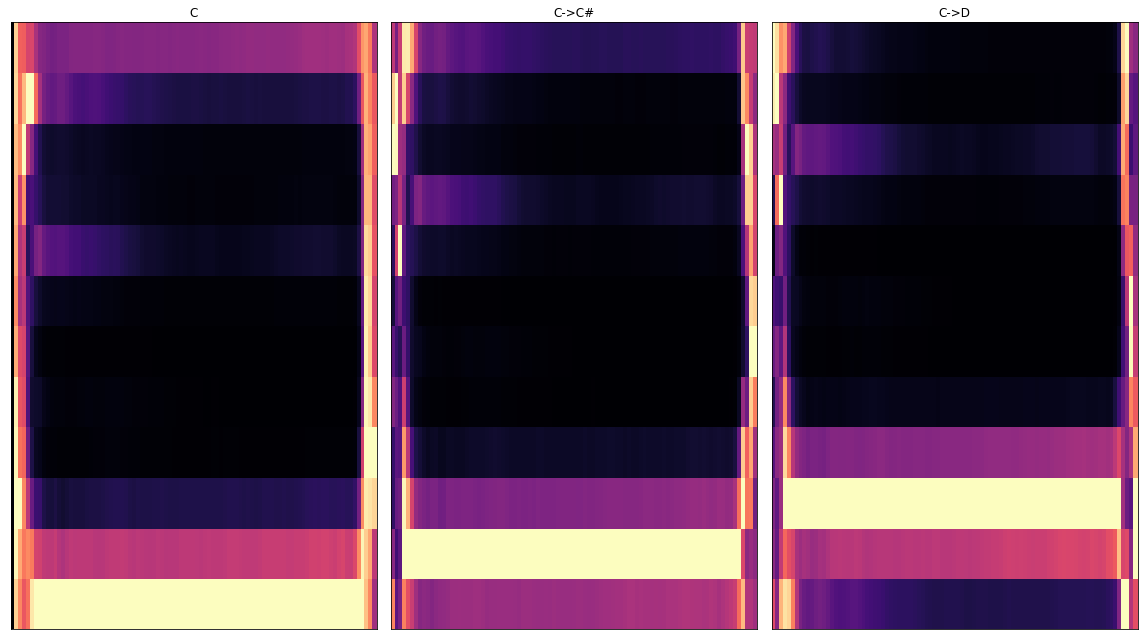

In [108]:
def pitch_shift(audio, sr, semitone):
		shifted = librosa.effects.pitch_shift(audio, sr, semitone)
		return shifted

plt.close()
plt.figure(figsize=(16,9))

plt.subplot(1,3,1)
librosa.display.specshow(ChromaSpectrogram(piano['do']))
plt.title('C')

plt.subplot(1,3,2)
librosa.display.specshow(ChromaSpectrogram(pitch_shift(piano['do'], sr, 1)))
plt.title('C->C#')

plt.subplot(1,3,3)
librosa.display.specshow(ChromaSpectrogram(pitch_shift(piano['do'], sr, 2)))
plt.title('C->D')

plt.tight_layout()
plt.savefig('pitch_shift.png')